# 3장 평가

### 01. 정확도

In [55]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifiter(BaseEstimator):
    # fit() 매서드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass

    # predict() 매서드는 단순히 Sex 피처가 1 이면 0, 그렇지 않으면 1로 예측함
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1

        return pred

In [56]:
## 생성된 MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 원본 데이터를 제로당, 데이터 가공, 학습 데이터/테스트 데이터 분할
trainic_df = pd.read_csv(r'C:\Users\kdp\OneDrive\바탕 화면\09.머신러닝\Data\titanic_train.csv')
y_trainic_df = trainic_df['Survived']
X_trainic_df = trainic_df.drop('Survived', axis =1)
X_trainic_df = transform_features(X_trainic_df)
X_train, X_test, y_train, y_test = train_test_split(X_trainic_df, y_trainic_df,
                                                    test_size= 0.2, random_state=0)

# 위에서 생성한 Dummy Classifter를 이용해 학습/예측/평가 수행 
myclf = MyDummyClassifiter()
myclf.fit(X_train, y_train)

mypredictiors = myclf.predict(X_test)
print(f'Dummy Classifter의 정확도는: {accuracy_score(y_test, mypredictiors)}')
'''
Dummy Classifter의 정확도는: 0.7877094972067039
'''

Dummy Classifter의 정확도는: 0.7877094972067039


C:\Users\kdp\AppData\Local\Temp\ipykernel_6276\3120131405.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\kdp\AppData\Local\Temp\ipykernel_6276\3120131405.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

'\nDummy Classifter의 정확도는: 0.7877094972067039\n'

In [58]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifiter(BaseEstimator):
    def fit(self, X ,y):
        pass
    
    # 입력값으로 들어오는 x 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits()을 이용해 MIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 astype(int)로 1로 반환, 7번이 아니면 False이고 0를 반환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state= 11)

In [59]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifter로 학습/예측/정확도 평가
fakeclf = MyFakeClassifiter()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:',accuracy_score(y_test, fakepred))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는: 0.9


### 02. 오차 행렬

In [60]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

# '''
# [오차 행렬 결과]
# TN  FP
# FN  TP
# '''

array([[405,   0],
       [ 45,   0]], dtype=int64)

### 03. 정밀도와 재현율

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}')

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 제로당, 데이터 가공, 학습 데이터/테스트 데이터 분할
trainic_df = pd.read_csv(r'C:\Users\kdp\OneDrive\바탕 화면\09.머신러닝\Data\titanic_train.csv')
y_trainic_df = trainic_df['Survived']
X_trainic_df = trainic_df.drop('Survived', axis =1)
X_trainic_df = transform_features(X_trainic_df)
X_train, X_test, y_train, y_test = train_test_split(X_trainic_df, y_trainic_df,
                                                    test_size= 0.2, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

'''
오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
'''

오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


C:\Users\kdp\AppData\Local\Temp\ipykernel_6276\3120131405.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\kdp\AppData\Local\Temp\ipykernel_6276\3120131405.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

'\n오차행렬\n[[108  10]\n [ 14  47]]\n정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705\n'

In [63]:
import numpy as np

### 정밀도/재현율 트레이트오프

pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(f'predict_proba()결과 shpae : {pred_proba.shape}')
print(f'predict_proba array에서 앞 3개만 샘플로 추출 \n', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병함해 예측 확률과 결괏값을 한눈에 확인

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis =1 )
print(f'두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

predict_proba()결과 shpae : (179, 2)
predict_proba array에서 앞 3개만 샘플로 추출 
 [[0.44935225 0.55064775]
 [0.86335511 0.13664489]
 [0.86429643 0.13570357]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935225 0.55064775 1.        ]
 [0.86335511 0.13664489 0.        ]
 [0.86429643 0.13570357 0.        ]]


In [64]:
from sklearn.preprocessing import Binarizer

X = [[1,  -1,   2],
     [2,   0,   0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같거나 적으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [65]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임계값
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 컬럼, 즉 Postive 클래스 컬럼 하나만 추출해 Binarizer를 적용
predict_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(predict_proba_1)
custom_predict = binarizer.transform(predict_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [66]:
# Binarizer의 threshold 설정값 0.4로 설정, 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4

# predict_proba() 반환값의 두 번째 컬럼, 즉 Postive 클래스 컬럼 하나만 추출해 Binarizer를 적용
predict_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(predict_proba_1)
custom_predict = binarizer.transform(predict_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


In [ ]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, predict_proba_c1, thresholds):
    # thresholds list객체 내의 값을 차례로 lieration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(predict_proba_c1)
        custom_predict = binarizer.transform(predict_proba_1)
        print()
        print('임계값', custom_threshold)
        get_clf_eval(y_test, custom_predict)


get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)


임계값 0.4
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197

임계값 0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869

임계값 0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705

임계값 0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377

임계값 0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


In [68]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recall, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape:', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 indsx 10개:', thr_index)
print('샘플용 10개의 임곗값:', thresholds.shape)

# 15 step  단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값 별 정밀도 : ', np.round(precisions[thr_index], 3))
print('샘플 임계값 별 재현율 : ', np.round(recall[thr_index], 3))

반환된 분류 결정 임곗값 배열의 shape: (147,)
샘플 추출을 위한 임계값 배열의 indsx 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: (147,)
샘플 임계값 별 정밀도 :  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값 별 재현율 :  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


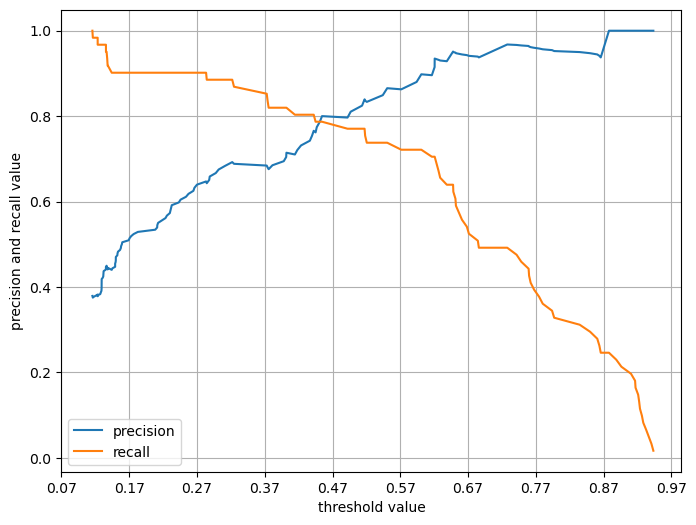

In [69]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 채현율 ndarray 추출.
    precisions, recall, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    # X축을 threshold값으로 y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '-', label='precision')
    plt.plot(thresholds, recall[0:threshold_boundary], label = 'recall')

    # threshold 값 x 축의 Scale을 0,1 단위로 변환
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    # x축, y축 label 과 legend, 그리고 grid 설정
    plt.xlabel('threshold value')
    plt.ylabel('precision and recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

### 04. F1 스코어

In [70]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print(f'F1 스코어: {f1:.4f}')

F1 스코어: 0.7966


In [71]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}')

thresholds = [0.4,0.45,0.5,0.55,0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, -1], thresholds)

ValueError: Expected 2D array, got 1D array instead:
array=[0.55064775 0.13664489 0.13570357 0.15031481 0.17656591 0.15768776
 0.12904511 0.72771397 0.21814872 0.66814002 0.13821237 0.12941903
 0.1357405  0.12934056 0.43966456 0.14996978 0.11045828 0.25749268
 0.28879776 0.76223722 0.24315893 0.37571831 0.15344754 0.17288744
 0.13174372 0.22996172 0.17053651 0.09663869 0.26627951 0.31152613
 0.92353131 0.7746788  0.12838061 0.75924582 0.37288269 0.22996172
 0.09445724 0.59397426 0.06956416 0.1234948  0.30202578 0.10335405
 0.78006621 0.68434287 0.62057772 0.62067109 0.92838719 0.44222414
 0.92085513 0.13196918 0.49209943 0.12934056 0.14423595 0.65129871
 0.28441583 0.21146794 0.2538079  0.13571    0.15920997 0.40161934
 0.26467919 0.11294404 0.454472   0.44673657 0.37416478 0.11636723
 0.64818744 0.60096648 0.91699185 0.14927478 0.13221181 0.16929076
 0.12350958 0.94040085 0.21264241 0.12934056 0.283459   0.20840196
 0.79696902 0.13571    0.7599495  0.62876413 0.91630374 0.15981388
 0.92233281 0.91026752 0.15276924 0.1375847  0.83460266 0.12934056
 0.12934056 0.22996172 0.24583256 0.12934056 0.62067109 0.10116111
 0.92638597 0.12102774 0.39802175 0.93261004 0.52051719 0.0953073
 0.94326279 0.11819213 0.54412031 0.13866563 0.15025071 0.14927303
 0.44497249 0.11573102 0.15252582 0.12730438 0.32461308 0.51724753
 0.13174372 0.0840281  0.15805796 0.21127162 0.88858246 0.09465145
 0.12928357 0.13094562 0.08474207 0.41803173 0.01974988 0.12928357
 0.12780981 0.2880536  0.65651101 0.29773307 0.93261004 0.40194454
 0.6711466  0.51355235 0.57135187 0.43653428 0.74146852 0.22356775
 0.12367553 0.84990723 0.86565305 0.14927303 0.13227898 0.10371244
 0.11386661 0.65202361 0.10082952 0.27002658 0.87778554 0.1828031
 0.38134888 0.62629695 0.61651659 0.13536702 0.74838702 0.89611668
 0.42351943 0.14523152 0.68584875 0.66092028 0.15652281 0.76738866
 0.11140727 0.64779433 0.41445142 0.63856712 0.8636594  0.32202995
 0.11399917 0.86053885 0.12904511 0.79383978 0.23280098 0.22562756
 0.49675952 0.08920162 0.15029262 0.45125913 0.51807937].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 05. ROC 곡선과 AUC

In [ ]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임계값을 5 step으로 추출
# threshold[0]은 max(예측확률)+1로 임의 설정됨, 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1,thresholds.shape[0], 5)
print(f'샘플 추출을 위한 임겠값 배열의 index : {thr_index}')
print(f'샘플 index로 추출한 임계값 : {np.round(thresholds[thr_index], 2)}')

# 5 step 단위로 임계값에 따른 FPR, TPR 값
print(f'샘플 임계값 별 FPR : {np.round(fprs[thr_index], 3)}')
print(f'샘플 임계값 별 TPR : {np.round(tprs[thr_index], 3)}')

샘플 추출을 위한 임겠값 배열의 index : [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임계값 : [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임계값 별 FPR : [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임계값 별 TPR : [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


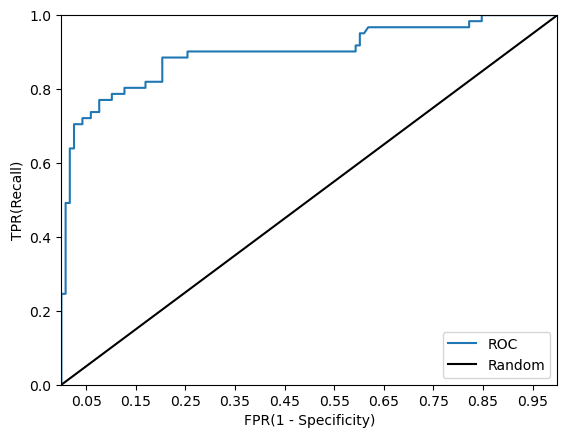

In [ ]:
def roc_curve_plot(y_test, pred_proba_c1):

    # 임계값에 따른 FPR, TPR 값을 봔한받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1],'k-', label='Random')

    # FPR x축의 Scale을 0.1 단위로 변경 x축, y축 이름 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end, 0.1), 2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1 - Specificity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:, 1])

In [ ]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print(f'ROC AUC 값 : {roc_score:.4f}')

ROC AUC 값 : 0.8987


In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {roc_auc:.4f}')

### 06. 파마 인디언 당뇨병 예측

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
diabets_data = pd.read_csv(r'C:\Users\kdp\OneDrive\바탕 화면\09.머신러닝\교과서\diabetes.csv')
print(diabets_data['Outcome'].value_counts())
diabets_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
diabets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome 칼럼으로 레이블 값임, 칼럼 위치 -1을 사용해 추출
X = diabets_data.iloc[:, :-1]
y = diabets_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1: 0.6465, AUC: 0.8083


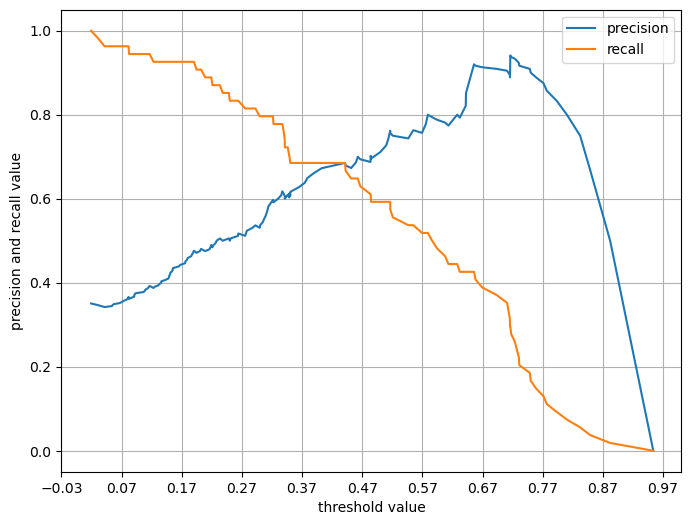

In [ ]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [ ]:
# 피처 값의 분포도 살펴보기
diabets_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


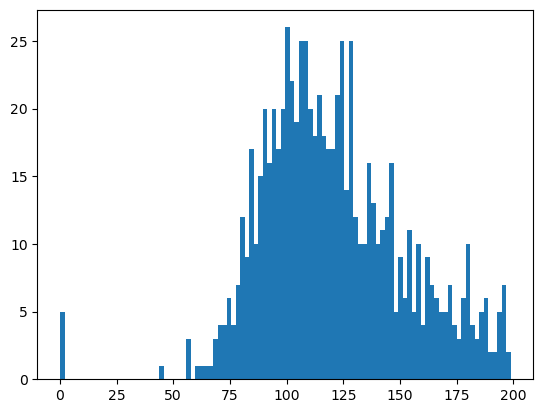

In [ ]:
# 수치가 0인게 나와버림림

plt.hist(diabets_data['Glucose'], bins=100)
plt.show()

In [ ]:
# 0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수 
total_count = diabets_data['Glucose'].count()

# v피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고 퍼센트 계산 
for feature in zero_features:
    zero_count = diabets_data[diabets_data[feature]==0][feature].count()
    print(f'{feature} 0 건수는 {zero_count}, 페센트 {100*zero_count / total_count:.2f}')

## 데이터가 적기 때문에 평균값으로 대체
mean_zero_feature = diabets_data[zero_features].mean()
diabets_data[zero_features] = diabets_data[zero_features].replace(0, mean_zero_feature)

Glucose 0 건수는 5, 페센트 0.65
BloodPressure 0 건수는 35, 페센트 4.56
SkinThickness 0 건수는 227, 페센트 29.56
Insulin 0 건수는 374, 페센트 48.70
BMI 0 건수는 11, 페센트 1.43


In [ ]:
X = diabets_data.iloc[:, :-1]
y = diabets_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433


In [ ]:
# get_clf_eval의 함수가 변경되어 다시 불러옴

def get_eval_by_threshold(y_test, predict_proba_c1, thresholds):
    # thresholds list객체 내의 값을 차례로 lieration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(predict_proba_c1)
        custom_predict = binarizer.transform(predict_proba_1)
        print()
        print('임계값', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [ ]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds )


임계값 0.3
오차행렬
[[92 26]
 [ 7 54]]
정확도: 0.8156, 정밀도: 0.6750, 재현율: 0.8852, F1: 0.7660

임계값 0.33
오차행렬
[[94 24]
 [ 9 52]]
정확도: 0.8156, 정밀도: 0.6842, 재현율: 0.8525, F1: 0.7591

임계값 0.36
오차행렬
[[94 24]
 [ 9 52]]
정확도: 0.8156, 정밀도: 0.6842, 재현율: 0.8525, F1: 0.7591

임계값 0.39
오차행렬
[[96 22]
 [11 50]]
정확도: 0.8156, 정밀도: 0.6944, 재현율: 0.8197, F1: 0.7519

임계값 0.42
오차행렬
[[100  18]
 [ 12  49]]
정확도: 0.8324, 정밀도: 0.7313, 재현율: 0.8033, F1: 0.7656

임계값 0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1: 0.7869

임계값 0.48
오차행렬
[[106  12]
 [ 14  47]]
정확도: 0.8547, 정밀도: 0.7966, 재현율: 0.7705, F1: 0.7833

임계값 0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1: 0.7966


: 

In [ ]:
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 갈럼값을 Binarizer반환
pred_th_48 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))
get_clf_eval(y_test, pred_th_48,pred_proba[:, 1] )

오차행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433
